# Logistic Regression (Scikit Python package) & Logit (statsmodels Python package)
- When you use "logitic regression", it is important to create dummy variables for categorical columns

### Dataset
Source: Data Mining for the Masses by Matthew North
    
* **Age**: The age in years of the person, rounded to the nearest whole year. 
* **Marital_Status**: The person’s current marital status, indicated by a coded number: **0–Single, never married; 1–Married; 2–Divorced; 3–Widowed** 
* **Gender**: The person’s gender: **0 for female; 1 for male**. 
* **Weight_Category**: The person’s weight categorized into one of three levels: **0 for normal weight range; 1 for overweight; and 2 for obese** 
* **Cholesterol**: The person’s cholesterol level, as recorded at the time of their treatment for their most recent heart attack (their only heart attack, in the case of those individuals in the scoring data set. 
* **Stress_Management**: A binary attribute indicating whether or not the person has previously attended a stress management course: **0 for no; 1 for yes**. 
* **Trait_Anxiety**: A score on a scale of **0 to 100** measuring the level of each person’s natural stress levels and abilities to cope with stress. A short time after each person in each of the two data sets had recovered from their first heart attack, they were administered a standard test of natural anxiety. Their scores are tabulated and recorded in this attribute along five point increments. A score of 0 would indicate that the person never feels anxiety, pressure or stress in any situation, while a score of 100 would indicate that the person lives in a constant state of being overwhelmed and unable to deal with his or her circumstances. 
* **2nd_Heart_Attack**: This attribute exists only in the training data set. It will be our label, the prediction or target attribute. In the training data set, the attribute is set to **‘yes’** for individuals who have suffered second heart attacks, and **‘no’** for those who have not.                  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from patsy import dmatrices

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading data

In [2]:
df=pd.read_csv("data/heartattack_train.csv")
print df.head()

   Age  Marital_Status  Gender  Weight_Category  Cholesterol  \
0   60               2       0                1          150   
1   69               2       1                1          170   
2   52               1       0                0          174   
3   66               2       1                1          169   
4   70               3       0                1          237   

   Stress_Management  Trait_Anxiety 2nd_Heart_Attack  
0                  1             50              Yes  
1                  0             60              Yes  
2                  1             35               No  
3                  0             60              Yes  
4                  0             65              Yes  


# Data wrangling & ETL: Data cleaningg & transformation

In [3]:
#mappling or replacing
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': '0'})
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': '1'})

In [4]:
#or you can do this to convert object to number
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype(int)
print df.dtypes

Age                  int64
Marital_Status       int64
Gender               int64
Weight_Category      int64
Cholesterol          int64
Stress_Management    int64
Trait_Anxiety        int64
2nd_Heart_Attack     int64
dtype: object


In [5]:
marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
df_new = pd.concat([df, marital_dummies], axis=1)
df_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3
0,60,2,0,1,150,1,50,1,0,0,1,0


In [6]:
weight_dummies = pd.get_dummies(df_new['Weight_Category'], prefix='Weight')
df_new = pd.concat([df_new, weight_dummies], axis=1)
df_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2
0,60,2,0,1,150,1,50,1,0,0,1,0,0,1,0


In [7]:
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
df_new = pd.concat([df_new, gender_dummies], axis=1)
df_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1
0,60,2,0,1,150,1,50,1,0,0,1,0,0,1,0,1,0


In [8]:
stress_dummies = pd.get_dummies(df['Stress_Management'], prefix='Stress')
df_new = pd.concat([df_new, stress_dummies], axis=1)
df_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1,Stress_0,Stress_1
0,60,2,0,1,150,1,50,1,0,0,1,0,0,1,0,1,0,0,1


In [9]:
# correlation analysis
df_new.corr()

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1,Stress_0,Stress_1
Age,1.000000,0.427159,0.076195,0.402007,0.395331,-0.359295,0.667169,0.499182,0.000689,-0.466092,0.196552,0.336010,-0.502928,0.340887,0.159133,-0.076195,0.076195,0.359295,-0.359295
Marital_Status,0.427159,1.000000,-0.033225,0.065402,0.273574,-0.291773,0.238340,0.364978,-0.511801,-0.638009,0.306019,0.728178,-0.093517,0.077854,0.013216,0.033225,-0.033225,0.291773,-0.291773
Gender,0.076195,-0.033225,1.000000,0.448531,0.191354,-0.241320,0.082007,0.317746,0.128907,-0.253841,0.368523,-0.234997,-0.465250,0.196746,0.281433,-1.000000,1.000000,0.241320,-0.241320
Weight_Category,0.402007,0.065402,0.448531,1.000000,0.397702,-0.347322,0.501244,0.730832,0.025951,-0.257491,0.357585,-0.152722,-0.854024,0.087754,0.826006,-0.448531,0.448531,0.347322,-0.347322
Cholesterol,0.395331,0.273574,0.191354,0.397702,1.000000,-0.405735,0.579485,0.506531,-0.303985,-0.065453,0.104248,0.135366,-0.375862,0.104245,0.289266,-0.191354,0.191354,0.405735,-0.405735
Stress_Management,-0.359295,-0.291773,-0.241320,-0.347322,-0.405735,1.000000,-0.321362,-0.439473,0.278711,0.179056,-0.260109,-0.061928,0.299208,-0.035432,-0.284087,0.241320,-0.241320,-1.000000,1.000000
Trait_Anxiety,0.667169,0.238340,0.082007,0.501244,0.579485,-0.321362,1.000000,0.482548,-0.109359,-0.136640,0.024721,0.208677,-0.448879,0.083823,0.391489,-0.082007,0.082007,0.321362,-0.321362
2nd_Heart_Attack,0.499182,0.364978,0.317746,0.730832,0.506531,-0.439473,0.482548,1.000000,-0.244500,-0.441389,0.602321,-0.069830,-0.666185,0.144626,0.558125,-0.317746,0.317746,0.439473,-0.439473
Marital_0,0.000689,-0.511801,0.128907,0.025951,-0.303985,0.278711,-0.109359,-0.244500,1.000000,-0.186989,-0.205003,-0.113822,-0.175412,0.295718,-0.144607,-0.128907,0.128907,-0.278711,0.278711
Marital_1,-0.466092,-0.638009,-0.253841,-0.257491,-0.065453,0.179056,-0.136640,-0.441389,-0.186989,1.000000,-0.622918,-0.345857,0.362441,-0.295528,-0.058252,0.253841,-0.253841,-0.179056,0.179056


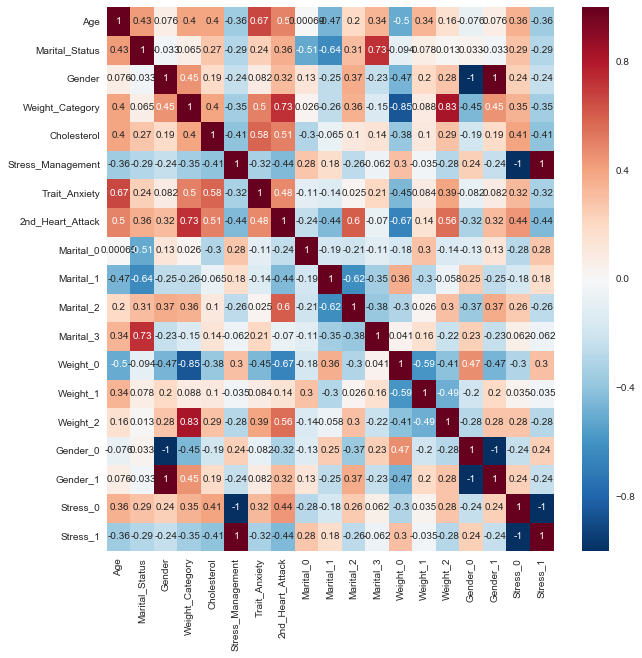

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True)

# Model Building & Validation

# Logistic Regression
* Unlike linear regression, logistic regression is for **classification**
* y value is categorical (e.g., yes/no, pass/fail, good credit/bad credit)
<img src="images\ppt\slide24.gif">
<img src="images\ppt\slide25.gif">

### Logistic regression vs Linear regression
<img src="http://www.saedsayad.com/images/LogReg_1.png">

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
Age                  138 non-null int64
Marital_Status       138 non-null int64
Gender               138 non-null int64
Weight_Category      138 non-null int64
Cholesterol          138 non-null int64
Stress_Management    138 non-null int64
Trait_Anxiety        138 non-null int64
2nd_Heart_Attack     138 non-null int64
Marital_0            138 non-null uint8
Marital_1            138 non-null uint8
Marital_2            138 non-null uint8
Marital_3            138 non-null uint8
Weight_0             138 non-null uint8
Weight_1             138 non-null uint8
Weight_2             138 non-null uint8
Gender_0             138 non-null uint8
Gender_1             138 non-null uint8
Stress_0             138 non-null uint8
Stress_1             138 non-null uint8
dtypes: int64(8), uint8(11)
memory usage: 10.2 KB


In [12]:
#declare X variables and y variable
y = df_new['2nd_Heart_Attack']
X = df_new.drop(['2nd_Heart_Attack', 'Gender', 'Marital_Status', 'Weight_Category', 'Stress_Management', 
                 'Weight_0', 'Marital_0', 'Gender_0', 'Stress_0'], axis=1)

> Very important !!! 
- Please be noted that we created dummy variable for categorical columns (e.g., Weight_Category, Marital_Status)
- When we declare X, we drop Weight_0, Marital_0, Gender_0, and Stress_0 to avoid multicollineary.
- For example, if you keep all three Marital_status dummy variables (Marital_0, Marital_1, Marital_2), this causes multicollinearity: Let's say you know one value (e.g., Marital_0) and then you automatically know the other two values (Marital_1, Marital_2). This means Marital_0, Marital_1, and Marital_2 are highly correlated --> multicollinearity
- To deal with multicollinearity, remove one dummy variable (e.g., Weight_0, Marital_0, Gender_0, Stress_0) of each categorial variable. And Weight_0 serves as the base for Weight_Category and Marital_0 as the baseline for Marital_Status

In [13]:
X.head(2)

,Age,Cholesterol,Trait_Anxiety,Marital_1,Marital_2,Marital_3,Weight_1,Weight_2,Gender_1,Stress_1
0,60,150,50,0,1,0,1,0,0,1
1,69,170,60,0,1,0,1,0,1,0


In [14]:
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"






In [15]:
#Model evaluation





> **90.5% model accuracy**
- **0.895 AUC score; AUC = Area Under Curve**
    - TPR = (true positives/total positives) = 23/23 = 1.00
    - FPR = (false positives/total negatives) = 4/19 = 0.85 

In [16]:
# generate class probabilities




#1st column: probability of NOT having 2nd heart attack
#2nd column: probabiility of having 2nd heart attack

- 1st patient: 61% chance having 2nd heart attack
- 2nd patient: **99%** chance having 2nd heart attack (this person needs attention)
- You would export this probability information as Excel file and do additional analysis

# Modely Deployment : Make Predictions on the new data

In [99]:
score=pd.read_csv("data/heartattack_scoring.csv")
score.head(2)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety
0,61,0,1,1,139,1,50
1,55,2,1,2,163,0,40


In [100]:
marital_dummies = pd.get_dummies(score['Marital_Status'], prefix='Marital')
score_new = pd.concat([score, marital_dummies], axis=1)
score_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Marital_0,Marital_1,Marital_2,Marital_3
0,61,0,1,1,139,1,50,1.0,0.0,0.0,0.0


In [101]:
weight_dummies = pd.get_dummies(score_new['Weight_Category'], prefix='Weight')
score_new = pd.concat([score_new, weight_dummies], axis=1)
score_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2
0,61,0,1,1,139,1,50,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
gender_dummies = pd.get_dummies(score_new['Gender'], prefix='Gender')
score_new = pd.concat([score_new, gender_dummies], axis=1)
score_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1
0,61,0,1,1,139,1,50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [103]:
stress_dummies = pd.get_dummies(score_new['Stress_Management'], prefix='Stress')
score_new = pd.concat([score_new, stress_dummies], axis=1)
score_new.head(1)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1,Stress_0,Stress_1
0,61,0,1,1,139,1,50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [104]:
score_X = score_new.drop(['Gender', 'Marital_Status', 'Weight_Category', 'Stress_Management', 'Weight_0', 'Marital_0', 
                          'Gender_0', 'Stress_0'], axis=1)
score_X.head(2)

,Age,Cholesterol,Trait_Anxiety,Marital_1,Marital_2,Marital_3,Weight_1,Weight_2,Gender_1,Stress_1
0,61,139,50,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,55,163,40,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [105]:
output_scoring = lr.predict(score_X)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted 2nd Heart Attack'])
predicted_y

,Predicted 2nd Heart Attack
0,0
1,1
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [106]:
probs = lr.predict_proba(score_X)
probs = pd.DataFrame(probs, columns=['prob of NO', 'prob of YES'])
probs

,prob of NO,prob of YES
0,0.793509,0.206491
1,0.092994,0.907006
2,0.660511,0.339489
3,0.215004,0.784996
4,0.335785,0.664215
5,0.925507,0.074493
6,0.987027,0.012973
7,0.601096,0.398904
8,0.096151,0.903849
9,0.948385,0.051615


In [107]:
risky_patients = predicted_y.join(probs)
risky_patients

,Predicted 2nd Heart Attack,prob of NO,prob of YES
0,0,0.793509,0.206491
1,1,0.092994,0.907006
2,0,0.660511,0.339489
3,1,0.215004,0.784996
4,1,0.335785,0.664215
5,0,0.925507,0.074493
6,0,0.987027,0.012973
7,0,0.601096,0.398904
8,1,0.096151,0.903849
9,0,0.948385,0.051615


In [108]:
risky_patients.to_csv("data/output_heartattack_LogisticRegression_ModelDeployment.csv")

# Appendix 1: 10 fold cross validation

In [109]:
# evaluate the logit model using 10-fold cross-validation





[ 0.71428571  0.92857143  1.          0.92857143  0.78571429  1.
  0.92857143  0.92857143  1.          1.        ]
0.921428571429


# Appendix 2: Model Evaluation with ROC 

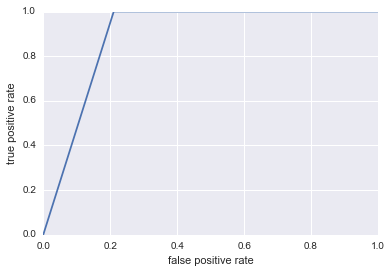

False-positive rate: [ 0.          0.21052632  1.        ]
True-positive rate:  [ 0.  1.  1.]
AUC score:  0.894736842105


In [110]:
y = df_new['2nd_Heart_Attack']
X = df_new.drop(['2nd_Heart_Attack', 'Gender', 'Marital_Status', 'Weight_Category', 'Stress_Management', 
                 'Weight_0', 'Marital_0', 'Gender_0', 'Stress_0'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

# Appendix 3. Logit with Statsmodels

# Logit
<img src="images\ppt\slide26.gif">

In [111]:
df=pd.read_csv("data/heartattack_train.csv")
df = df.replace({'2nd_Heart_Attack': 'No'}, {'2nd_Heart_Attack': '0'})
df = df.replace({'2nd_Heart_Attack': 'Yes'}, {'2nd_Heart_Attack': '1'})
df['2nd_Heart_Attack'] = df['2nd_Heart_Attack'].astype(int)
marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
df_new = pd.concat([df, marital_dummies], axis=1)
weight_dummies = pd.get_dummies(df_new['Weight_Category'], prefix='Weight')
df_new = pd.concat([df_new, weight_dummies], axis=1)
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')
df_new = pd.concat([df_new, gender_dummies], axis=1)
stress_dummies = pd.get_dummies(df['Stress_Management'], prefix='Stress')
df_new = pd.concat([df_new, stress_dummies], axis=1)
df_new.head(2)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack,Marital_0,Marital_1,Marital_2,Marital_3,Weight_0,Weight_1,Weight_2,Gender_0,Gender_1,Stress_0,Stress_1
0,60,2,0,1,150,1,50,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,69,2,1,1,170,0,60,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [112]:
y = df_new['2nd_Heart_Attack']
X = df_new.drop(['2nd_Heart_Attack', 'Gender', 'Marital_Status', 'Weight_Category', 'Stress_Management', 
                 'Weight_0', 'Marital_0', 'Marital_1', 'Gender_0', 'Stress_0'], axis=1)
X.head(2)

,Age,Cholesterol,Trait_Anxiety,Marital_2,Marital_3,Weight_1,Weight_2,Gender_1,Stress_1
0,60,150,50,1.0,0.0,1.0,0.0,0.0,1.0
1,69,170,60,1.0,0.0,1.0,0.0,1.0,0.0


> The above model seems to be working better than the one below. The above uses both Marital_0 (single) and Marital_1 (married) as the baseline for Maritial_Status

In [113]:
# we use statsmodels for logit function
logit = sm.Logit(y, X) 
model_logit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.122103
         Iterations 11


In [114]:
print model_logit.predict()
#0.99 refers the probability of having 2nd heart attack is 99%. 
#This probability is almost same as that of the logistic regression model

[  9.99613828e-01   9.97187848e-01   3.64255563e-07   9.99403291e-01
   8.78305197e-01   3.64255563e-07   1.89913534e-01   1.23741890e-01
   1.51176955e-01   1.47685612e-06   7.54722347e-03   8.68968456e-01
   9.99999573e-01   9.99849413e-01   1.00000000e+00   9.59825283e-01
   3.36306846e-01   3.65363849e-07   1.03126471e-06   1.96789173e-04
   2.48119094e-06   9.99607637e-01   9.96397990e-01   1.28028412e-07
   7.47356385e-01   7.18058591e-01   9.99147620e-01   7.66881193e-02
   6.09538291e-07   1.15162497e-02   9.99999770e-01   9.99151001e-01
   6.37515975e-03   8.82558573e-07   9.99999766e-01   9.98997905e-01
   1.44745573e-03   9.99998803e-01   9.99872401e-01   9.83146213e-01
   2.30059502e-05   1.02717071e-06   1.13455128e-03   9.34437797e-01
   9.89779363e-01   4.84506349e-03   4.33112963e-01   1.97573363e-04
   9.99137396e-01   1.48274243e-06   8.67882263e-01   9.99999747e-01
   1.89302320e-01   1.97573363e-04   7.18058591e-01   9.89819525e-01
   8.08724360e-01   6.18167750e-04

In [115]:
for i in model_logit.predict():
    print i

0.99961382795
0.997187848266
3.64255563455e-07
0.999403290754
0.878305197423
3.64255563455e-07
0.18991353353
0.123741889948
0.151176955437
1.47685611594e-06
0.00754722346662
0.868968455503
0.999999572624
0.999849412859
0.999999999676
0.9598252829
0.336306845969
3.65363848592e-07
1.03126471482e-06
0.00019678917324
2.48119094078e-06
0.999607636796
0.996397989925
1.28028412171e-07
0.74735638513
0.718058590927
0.999147620237
0.0766881192734
6.09538290942e-07
0.0115162496757
0.999999770061
0.999151001215
0.00637515975027
8.82558573272e-07
0.999999766374
0.998997904742
0.00144745573274
0.999998803261
0.999872401275
0.983146212936
2.30059501897e-05
1.02717071471e-06
0.00113455127776
0.934437797095
0.989779363484
0.00484506349495
0.433112962604
0.0001975733628
0.999137396372
1.48274242703e-06
0.86788226331
0.999999746627
0.189302319968
0.0001975733628
0.718058590927
0.989819525185
0.808724359532
0.000618167749788
0.000117609035452
0.000109957481529
8.72089281332e-07
2.70673109994e-05
0.8330451

In [116]:
print model_logit.summary()
## the results show that only three variables are significant (p value < 0.05): Weight_Category, Marital status, stress management

                           Logit Regression Results                           
Dep. Variable:       2nd_Heart_Attack   No. Observations:                  138
Model:                          Logit   Df Residuals:                      129
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Oct 2016   Pseudo R-squ.:                  0.8238
Time:                        08:48:12   Log-Likelihood:                -16.850
converged:                       True   LL-Null:                       -95.640
                                        LLR p-value:                 5.128e-30
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Age              -0.5188      0.204     -2.546      0.011        -0.918    -0.119
Cholesterol       0.0040      0.029      0.137      0.891        -0.053     0.061
Trait_Anxiety     0.3296      0.165     

> Some predictors have a low p-value (less than 0.05): Trait_Anxiety, Marital_Status, Weight_Category

- For example, Weight_2 (obese) has a high positive coefficient (14.57), meaning an increase of Weight_Category increases the chance for 2nd heart attack
- For example, Marital_2 (divorced) has a high positive coefficient (14.02), meaning that those divorced are more likey to experience 2nd heart attack when compared to those single. This might have to do with age. 

In [117]:
#http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/discrete_choice_example.html
model_logit.pred_table()

array([[ 67.,   3.],
       [  2.,  66.]])

The model accuracy is (67 + 66) / 138 = 0.96

In [118]:
# look at the confidence interval of each coeffecient
print model_logit.conf_int()

                      0          1
Age           -0.918160  -0.119488
Cholesterol   -0.052736   0.060692
Trait_Anxiety  0.006792   0.652324
Marital_2      4.150421  23.891615
Marital_3      1.557817  14.370643
Weight_1       3.010091  12.921751
Weight_2       5.765688  23.377240
Gender_1      -2.993519   1.459923
Stress_1      -3.810761   3.664308


> higher martial status, higher weight category, lower stress management (meaning NO stress mgt) ==> higher 2nd heart attack risk

In [119]:
# odds ratios only
print np.exp(model_logit.params)
## Take the exponential of each of the coefficients to generate the odds ratios. 

Age              5.952201e-01
Cholesterol      1.003986e+00
Trait_Anxiety    1.390354e+00
Marital_2        1.228148e+06
Marital_3        2.876214e+03
Weight_1         2.881081e+03
Weight_2         2.129642e+06
Gender_1         4.644978e-01
Stress_1         9.293906e-01
dtype: float64


In [120]:
for i in np.exp(model_logit.params):
    print i

0.595220064852
1.00398570974
1.39035360694
1228148.14188
2876.21368836
2881.08148197
2129641.71264
0.46449783996
0.929390566324


> **Odd rations** show how a 1 unit increase or decrease in a variable affects the odds of having 2nd heart attack
- For example, we can expect the odds of having 2nd heart attack to increase by about 1228148% if the marital status is divorced.
- We can expect the odds of having 2nd heart attack to increase by about 2876% if the weight category is overweight.

# References
- http://blog.yhat.com/posts/logistic-regression-and-python.html (anothere example of using sklearn for logistic regression)